In [ ]:
from google.colab import files


files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chest-xray-pneumonia.zip
replace dataset/chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/chest_xray/__MACOSX/chest_xray/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/chest_xray/__MACOSX/chest_xray/._test? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
train_dir = "dataset/chest_xray/train"
test_dir = "dataset/chest_xray/test"
val_dir = "dataset/chest_xray/val"

In [ ]:
# Image augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale validation and test data
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load images
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers

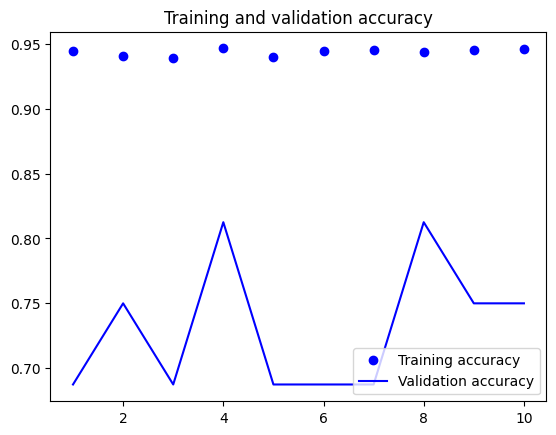

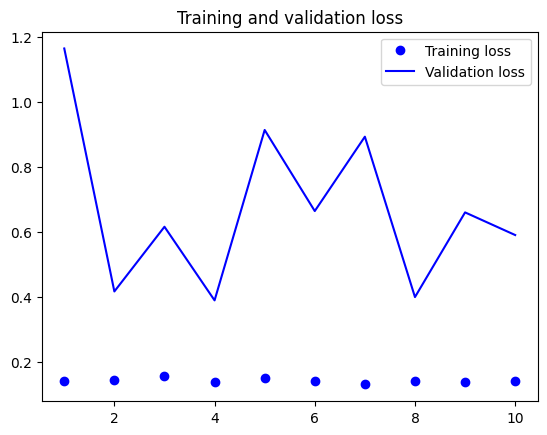

In [ ]:
# Plots accuracy trends over epochs to assess model performance.
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

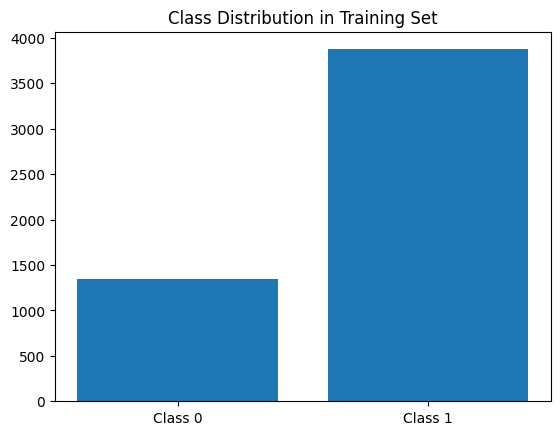

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels, counts = np.unique(train_data.classes, return_counts=True)
plt.bar(labels, counts)
plt.xticks(labels, ['Class 0', 'Class 1'])
plt.title("Class Distribution in Training Set")
plt.show()

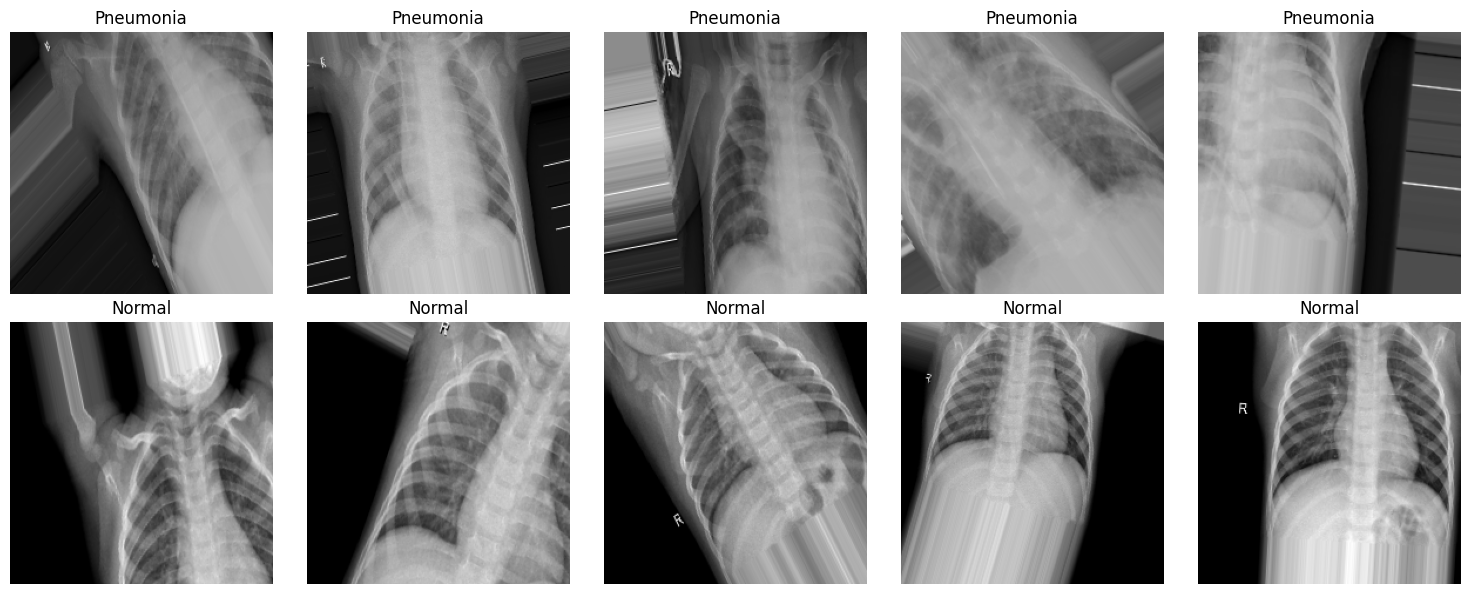

In [ ]:
# Get few samples for both the classes
import matplotlib.pyplot as plt
import numpy as np

# Use next(train_data) instead of train_data.next()
X_train_batch, y_train_batch = next(train_data)

# Get indices of pneumonia and normal samples
pneumonia_indices = np.where(y_train_batch == 1)[0]
normal_indices = np.where(y_train_batch == 0)[0]

# Get the first 5 pneumonia and normal samples
pneumonia_samples = X_train_batch[pneumonia_indices[:5]]
normal_samples = X_train_batch[normal_indices[:5]]

# Plot the samples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i < 5:
        # Display pneumonia samples
        ax.imshow(pneumonia_samples[i])
        ax.set_title("Pneumonia")
    else:
        # Display normal samples
        ax.imshow(normal_samples[i - 5])
        ax.set_title("Normal")

    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import glob #Import glob module
import numpy as np

# Get the path to the sub-directories
normal_cases_dir = os.path.join(val_dir, 'NORMAL') #Use os.path.join to create paths
pneumonia_cases_dir = os.path.join(val_dir, 'PNEUMONIA') #Use os.path.join to create paths

# Get the list of all the images
#Use glob.glob to find files matching the pattern
normal_cases = glob.glob(os.path.join(normal_cases_dir, '*.jpeg'))
pneumonia_cases = glob.glob(os.path.join(pneumonia_cases_dir, '*.jpeg'))

# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []


# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)

# Pneumonia cases
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)

# Convert the list into numpy arrays
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print("Total number of validation examples: ", valid_data.shape)
print("Total number of labels:", valid_labels.shape)

Total number of validation examples:  (16, 224, 224, 3)
Total number of labels: (16, 2)


In [ ]:
import imgaug.augmenters as iaa
# Augmentation sequence
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20), # roatation
    iaa.Multiply((1.2, 1.5))]) #random brightness

In [ ]:
def data_gen(data, batch_size):
    # Get total number of samples in the data
    n = len(data)
    steps = n//batch_size

    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size,2), dtype=np.float32)

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)

    # Initialize a counter
    i =0
    while True:
        np.random.shuffle(indices)
        # Get the next batch
        count = 0
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            img_name = data.iloc[idx]['image']
            label = data.iloc[idx]['label']

            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (224,224))

            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])

            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.

            batch_data[count] = orig_img
            batch_labels[count] = encoded_label

            # generating more samples of the undersampled class
            if label==0 and count < batch_size-2:
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2

            else:
                count+=1

            if count==batch_size-1:
                break

        i+=1
        yield batch_data, batch_labels

        if i>=steps:
            i=0

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, SeparableConv2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def build_model():
    # Specify tensorflow.keras.layers.Input here
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)

    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)

    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)

    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
    x = BatchNormalization(name='bn3')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
    x = BatchNormalization(name='bn4')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
    x = MaxPooling2D((2,2), name='pool4')(x)

    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout1')(x)
    x = Dense(512, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(2, activation='softmax', name='fc3')(x)

    model = Model(inputs=input_img, outputs=x)
    return model

In [ ]:
model =  build_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ImageInput (InputLayer)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1_1 (Conv2D)                     │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1_2 (Conv2D)                     │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2_1 (SeparableConv2D)            │ (None, 112, 112, 128)       │           8,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2_2 (SeparableConv2D)            │ (None, 112, 112, 128)       │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3_1 (SeparableConv2D)            │ (None, 56, 56, 256)         │          34,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn1 (BatchNormalization)             │ (None, 56, 56, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3_2 (SeparableConv2D)            │ (None, 56, 56, 256)         │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn2 (BatchNormalization)             │ (None, 56, 56, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3_3 (SeparableConv2D)            │ (None, 56, 56, 256)         │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4_1 (SeparableConv2D)            │ (None, 28, 28, 512)         │         133,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn3 (BatchNormalization)             │ (None, 28, 28, 512)         │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4_2 (SeparableConv2D)            │ (None, 28, 28, 512)         │         267,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn4 (BatchNormalization)             │ (None, 28, 28, 512)         │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4_3 (SeparableConv2D)            │ (None, 28, 28, 512)         │         267,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool4 (MaxPooling2D)                 │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 104,197,506 (397.48 MB)

 Trainable params: 104,194,434 (397.47 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
from keras.applications.vgg16 import VGG16

# Download VGG16 weights
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classification layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # You can adjust the number of units
predictions = Dense(1, activation='sigmoid')(x)  # For binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 657ms/step - accuracy: 0.9434 - loss: 0.1455 - val_accuracy: 0.6875 - val_loss: 1.1635
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 675ms/step - accuracy: 0.9380 - loss: 0.1526 - val_accuracy: 0.7500 - val_loss: 0.4165
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 646ms/step - accuracy: 0.9346 - loss: 0.1580 - val_accuracy: 0.6875 - val_loss: 0.6154
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 647ms/step - accuracy: 0.9449 - loss: 0.1376 - val_accuracy: 0.8125 - val_loss: 0.3890
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 641ms/step - accuracy: 0.9367 - loss: 0.1534 - val_accuracy: 0.6875 - val_loss: 0.9130
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 645ms/step - accuracy: 0.9465 - loss: 0.1334 - val_accuracy: 0.6875 - val_loss: 0.6637
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 637ms/step - accuracy: 0.9477 - loss: 0.1269 - val_accuracy: 0.6875 - val_loss: 0.8923
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 634ms/step - accuracy: 0.9405 -

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.8991 - loss: 0.2605
Test Loss: 0.2905
Test Accuracy: 0.8926


In [ ]:
# Plots accuracy trends over epochs to assess model performance.
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('pneumonia_detection_model.h5')